## Lab 3 

Alexander Plentsov, ISSA group

### Estimate parameters for degree distribution

In this task you are asked to calculate the degree destribution when $p \cdot n=1$ and when $p\cdot n\to +\infty$ 
and estimate parameter $\lambda$ for Poisson cases and $\mu,\sigma^2$ for Gaussian case.

<b>Case 1: $pn = 1$</b>

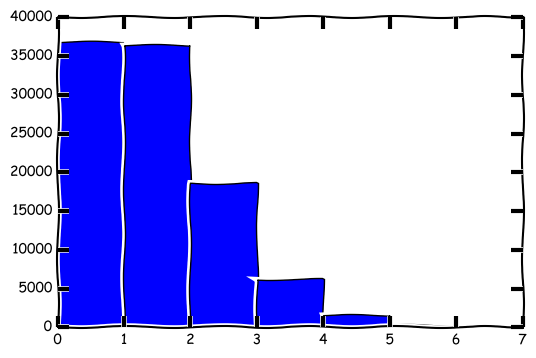

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline

n = 1000000
p = 1.0/n

G_1 = nx.fast_gnp_random_graph(n, p)
degrees_1 = G.degree().values()
plt.hist(degrees_1, bins = 7)
plt.show()

This distribution looks like a Poisson case.
Let's estimate the parameter $\lambda$. <br/>
As we know, ML estimator for $\lambda$ is $\bar{X}$

In [42]:
l = np.mean(degrees_1)
print l

1.00494


<b>Case 2</b>: $pn \to \infty$ <br/>
Let's use larger $p$

In [46]:
n_2 = 10000 # use smaller n to speed up computations
p_2 = 0.1

G_2 = nx.fast_gnp_random_graph(n_2, p_2)
degrees_2 = G_2.degree().values()

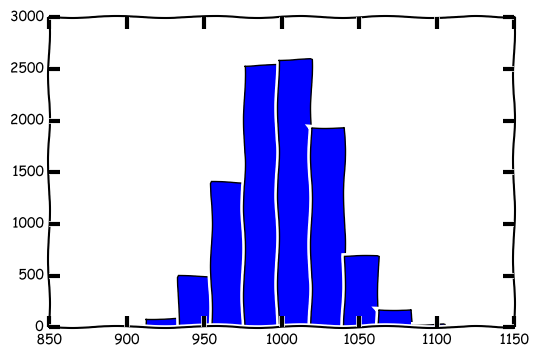

In [47]:
plt.hist(degrees_2, bins = 10)
plt.show()

Obviously, this distribution is a normal case. <br/>
Maximum Likelihood estimates for parameters are the following:<br/>
$\hat{mu} = \bar{X}$ <br/>
$\hat{\sigma}^2 = \frac{\sum_{i=1}^{n}(X_i - \mu)^2}{n}$

In [55]:
mu = np.mean(degrees_2)
sigma2 = sum((degrees_2 - mu)**2)/n_2

print "mu =", mu
print "sigma^2 =", sigma2

mu = 1000.931
sigma^2 = 889.783439


Find distributions in limit $n\to+\infty$ for degree destribution in Erdos model (use LATEX environment inside MarkDown Cell)

Hint: There are two cases that you should find from emprical data above

Degrees in Erdos model have a binomial distribution:<br/>
$P(k) = C_{n-1}^k p^k (1-p)^{n-1-k}$

<b>Case 1</b>: $pn = \lambda$ (fixed, so $p = \lambda/n$ is not fixed)<br/>
$$P(k) = \frac{(n-1)!}{k!(n-1-k)!} p^k (1-p)^{n-1-k} = 
\frac{(n-1)!}{k!(n-1-k)!} (\frac{\lambda}{n})^k (1-\frac{\lambda}{n})^{n-1-k} = 
\frac{\lambda^k}{k!}\frac{(n-1)(n-2)...(n-k)}{n^k}(1-\frac{\lambda}{n})^{n-1-k} = \\
= \frac{\lambda^k}{k!} (1-\frac{1}{n})(1-\frac{2}{n})...(1-\frac{k}{n}) (1-\frac{\lambda}{n})^{n}(1-\frac{\lambda}{n})^{-1-k}$$ <br/>
$$\lim_{n \to \infty} P(k) = \lim_{n \to \infty} \frac{\lambda^k}{k!} (1-\frac{1}{n})(1-\frac{2}{n})...(1-\frac{k}{n}) (1-\frac{\lambda}{n})^{n}(1-\frac{\lambda}{n})^{-1-k} =
\lim_{n \to \infty} \frac{\lambda^k}{k!} \cdot 1 \cdot 1 \cdot...\cdot 1 \cdot e^{-\lambda} \cdot 1 = \frac{\lambda^k}{k!}e^{-\lambda}$$ <br/>
As was demonstrated empirically and was mentioned in the lecture, this distribution tends to the Poisson.

<b>Case 2</b>: $pn \to \infty$ ($p$ is fixed) <br/>
As $p$ is fixed, limit of a binomial random variable is essentially a limit of a sum of $iid$ random variables. As $n$ goes to infinity, according to the CLT, degree distribution tends to a gaussian distribution.